# 1. Business Understanding

Safaricom is a telecommunication company based in Kenya.

Safaricom was formed in 1997 as a subsidiary of Telkom kenya and ,currently, mainly owned by the Government of kenya (35%) and Vodacom (35%).

Among its products, it offers financial services under the name MPESA.

MPESA can be used as an electronic wallet and can easily transfer money from one individual to another.

In 2013, MPESA ,in collaboration with CBA, introduced MSHWARI to MPESA users, which allowed you to save and borrow money.

A loan taken using MSHWARI is repayable within 30 days. If the loan is not paid, the loan repayment period is extended for an additional 30 days and will be charged an additional 7.5% facilitation fee on the outstanding loan balance.

Another service offered to Safaricom users is Okoa Jahazi.

Okoa Jahazi provides a credit loan to prepaid subscribers with an advance fee of 10% on the loan amount.

The debt is repaid by automatically deducting the outstanding balance when the user tops up.

The Okoa Jahazi debt must be fully repaid within five days; failing to do so gives Safaricom legal means to blacklist the user.

sources:   
safaricom wikipedia: https://en.wikipedia.org/wiki/Safaricom,  
ncba mshwari: https://ke.ncbagroup.com/m-shwari/,  
safaricom mshwari: https://www.safaricom.co.ke/media-center-landing/frequently-asked-questions/m-shwari-faqs-safaricom#:~:text=If%20you%20have%20not%20paid,on%20your%20outstanding%20loan%20balance.   
safaricom okoajahazi: https://www.safaricom.co.ke/media-center-landing/terms-and-conditions/safaricom-auto-okoa-services  

## 1.1. Business Objectives

The project aims at predicting when a person is defaulting on their loan.

Using the data collected, we build a model that incorporates all the relevant data in order to accurately predict the outcome.

Loan defaulting occurs when a person fails to repay a debt in the agreed period.

## 1.2. Situation Assessment

The team is made of 3 aspiring data scientists, Felista Mweni, Samwel Omondi and Yves HAvugimana;
who will work on building the required model using google collab and github.

The required tools are freely accessible (collab, jupyter and python packages). 

The project shall be completed within a week, by November 23rd, 2022.

The dataset being used contains 9 features and 10329 records.

The variables are as follows: 

- CUST_TXN_DATE:                 Customer Transaction Date
- CUST_ID_ACCT1:                 Account Identifier
- DEPOSIT_AMNT_MPSA:             Amount deposited on Mpesa
- RCVD_AMNT_MPSA:                Amount received on Mpesa
- TRSF_FROM_BANK_TO_MPESA_AMNT:  Amount on transfers from Bank on Mpesa
- MPSA_CREDITS:                  Mpesa credits
- DAYS_ARTM_LESS_2:              Number of days airtime is less than 2
- X_NR_TOT_LOAN_AMNT_OKOA_JAZI:  Total loan amount on okoa jahazi
- LOAN_AGE_DAYSL:                Loan age in days


## 1.3. Data Mining Goals

The goal of this project is to accurately predict that a subscriber is defaulting on a loan or not.

The criteria used for assessing is whether a subscriber defaulted is the inability to repay a loan past 90 days.



## 1.4. Project Plan

The project is divided in 4 sections:
- Business understanding: objectives, assessment and planning
- Data understanding: data collection, description, exploration and verification
- Data preparation: feature selection, data cleaning, feature engineering and data integration
- Modeling: model selection, training and evaluation

# 2. Data Understanding

In order to understand our data, we will have a look at the different aspects of the dataset:
- the size of the dataset,
- the types of variables in the dataset,
- descriptive statistics of the variables and
- Detecting errors, outliers and missing values

## 2.1. Data Collection

The data is obtained directly from NCBA bank database.

The following are the libraries that were used to load and pre-process the data for modeling:
- pandas,
- numpy,
- matplotlib and
- seaborn

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading and previewing data

df_raw = pd.read_excel("interview_database_raw.xlsx")

print("Data first rows")
display(df_raw.head())
print("\n ---- \n"*3)
print("Data last rows")
display(df_raw.tail())

Data first rows


,CUST_TXN_DATE,CUST_ID_ACCT1,DEPOSIT_AMNT_MPSA,RCVD_AMNT_MPSA,TRSF_FROM_BANK_TO_MPESA_AMNT,MPSA_CREDITS,DAYS_ARTM_LESS_2,X_NR_TOT_LOAN_AMNT_OKOA_JAZI,LOAN_AGE_DAYS
0,20160201,3008009,27590,53226.0,0.0,80816.0,139,800.0,5
1,20160201,12083048,2140,0.0,2170.0,4310.0,154,0.0,8
2,20160201,12930260,25700,37974.0,38972.0,102646.0,1,0.0,27
3,20160201,6422098,9250,2180.0,0.0,11430.0,64,0.0,5
4,20160201,5395787,102401,7169.0,0.0,109570.0,53,450.0,31



 ---- 

 ---- 

 ---- 

Data last rows


,CUST_TXN_DATE,CUST_ID_ACCT1,DEPOSIT_AMNT_MPSA,RCVD_AMNT_MPSA,TRSF_FROM_BANK_TO_MPESA_AMNT,MPSA_CREDITS,DAYS_ARTM_LESS_2,X_NR_TOT_LOAN_AMNT_OKOA_JAZI,LOAN_AGE_DAYS
10324,20160229,7261105,13490,0.0,24000.0,37490.0,0,0.0,287
10325,20160229,101780,200,7274.0,0.0,7474.0,158,0.0,8
10326,20160229,101780,200,7274.0,0.0,7474.0,158,0.0,8
10327,20160229,11654130,31000,43544.0,0.0,74544.0,128,0.0,5
10328,20160229,9064758,48640,1897.0,0.0,50537.0,35,10.0,9


All variables in our dataset appear to be numerical, both integers and float numbers can be seen.

## 2.2. Data Description

We check the size of our dataset as well as the types of variables we have.

In [3]:
# Checking the size of the dataset

(rows, cols) = df_raw.shape

print(f"Our dataset has {rows} rows and {cols} columns")

Our dataset has 10329 rows and 9 columns


In [4]:
# Column names and their data types

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CUST_TXN_DATE                 10329 non-null  int64  
 1   CUST_ID_ACCT1                 10329 non-null  int64  
 2   DEPOSIT_AMNT_MPSA             10329 non-null  int64  
 3   RCVD_AMNT_MPSA                10329 non-null  float64
 4   TRSF_FROM_BANK_TO_MPESA_AMNT  10329 non-null  float64
 5   MPSA_CREDITS                  10329 non-null  float64
 6   DAYS_ARTM_LESS_2              10329 non-null  int64  
 7   X_NR_TOT_LOAN_AMNT_OKOA_JAZI  10329 non-null  float64
 8   LOAN_AGE_DAYS                 10329 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 726.4 KB


The dataset has 9 variables

CUST_TXN_DATE:  Customer Transaction Date - dates from February 1st to February 29th, 2016  
CUST_ID_ACCT1:  Account Identifier  
DEPOSIT_AMNT_MPSA: Amount deposited on Mpesa  
RCVD_AMNT_MPSA: Amount received on Mpesa  
TRSF_FROM_BANK_TO_MPESA_AMNT: Amount on transfers from Bank on Mpesa  
MPSA_CREDITS: Mpesa credits  
DAYS_ARTM_LESS_2: Number of days airtime is less than 2  
X_NR_TOT_LOAN_AMNT_OKOA_JAZI: Total loan amount on okoa jahazi  
LOAN_AGE_DAYSL: Loan age in days  

The dataset has 5 integer variables (int64) and 4 variables of float64 type.  

All variable datatypes should be in interger form except the date that shall be in date format.  

In [5]:
# creating dataset with correct names

df = df_raw.copy()

# Changing column names

df.rename(columns = {'CUST_TXN_DATE':'customer_transaction_date',
                     'CUST_ID_ACCT1':'account_identifier',
                     'DEPOSIT_AMNT_MPSA': 'amount_deposited',
                     'RCVD_AMNT_MPSA': 'amount_received',
                     'TRSF_FROM_BANK_TO_MPESA_AMNT': 'amount_transfers_from_bank',
                     'MPSA_CREDITS': 'mpesa_credits',
                     'DAYS_ARTM_LESS_2': 'number_days_airtime<2',
                     'X_NR_TOT_LOAN_AMNT_OKOA_JAZI': 'okoa_jahazi_loan_amount',
                     'LOAN_AGE_DAYS': 'Loan_age'}, 
          inplace = True)

df.columns

Index(['customer_transaction_date', 'account_identifier', 'amount_deposited',
       'amount_received', 'amount_transfers_from_bank', 'mpesa_credits',
       'number_days_airtime<2', 'okoa_jahazi_loan_amount', 'Loan_age'],
      dtype='object')

All columns are renamed properly.

## 2.3. Data Quality Verification

We check for quality of data by identfying
- missing values
- duplicates
- outliers

In [6]:
# Checking for missing values

df.isnull().sum()

customer_transaction_date     0
account_identifier            0
amount_deposited              0
amount_received               0
amount_transfers_from_bank    0
mpesa_credits                 0
number_days_airtime<2         0
okoa_jahazi_loan_amount       0
Loan_age                      0
dtype: int64

The dataset has no missing values

In [7]:
# Cheking for duplicates

dups = df.duplicated().sum()

print(f"The dataset has {dups} duplicate rows.")

The dataset has 1342 duplicate rows.


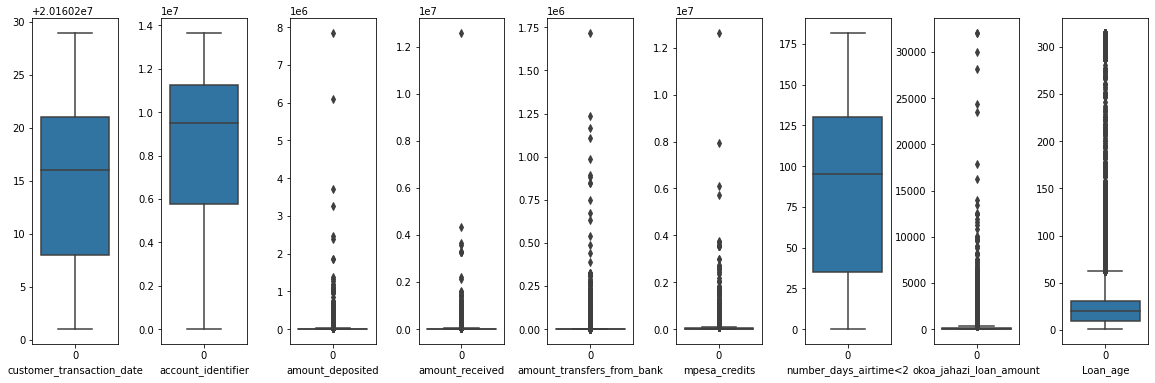

In [8]:
# Checking for outliers

cols_du = list(df.columns)

# initialize figure with 4 subplots in a row 

fig, ax = plt .subplots( 1, 9, figsize= (20, 6))

# add padding between the subplots 

plt.subplots_adjust(wspace=0.5)

# drawing boxplot for each variable

i = 0

for col in cols_du:
    sns.boxplot (data=df[col], ax=ax[i])
    ax[i].set_xlabel (col)
    i+= 1

We have 6 variables with outliers and 3 without outliers.  

The variables with outliers are:
- amount_deposited
- amount_received
- amount_transfers_from_bank
- mpesa_credits
- okoa_jahazi_loan_amount
- Loan_age

## 2.4. Data Exploration

In [9]:
# Data Description

descrip = pd.DataFrame(df.describe()).transpose()

for ind in list(descrip.index.values):
    print(f"The variable {ind} has a minimum of {descrip['min'].loc[ind]}, a maximum of {descrip['max'].loc[ind]}, a mean of {descrip['mean'].loc[ind]} and a median of {descrip['50%'].loc[ind]}")

# and a median of {descrip["50%"].loc[ind]}")

The variable customer_transaction_date has a minimum of 20160201.0, a maximum of 20160229.0, a mean of 20160214.702875398 and a median of 20160216.0
The variable account_identifier has a minimum of 515.0, a maximum of 13669753.0, a mean of 8416439.791073676 and a median of 9519227.0
The variable amount_deposited has a minimum of 0.0, a maximum of 7858300.0, a mean of 18602.614386678284 and a median of 2790.0
The variable amount_received has a minimum of 0.0, a maximum of 12605460.0, a mean of 30606.070653499854 and a median of 3854.0
The variable amount_transfers_from_bank has a minimum of 0.0, a maximum of 1720000.0, a mean of 5412.641001064963 and a median of 0.0
The variable mpesa_credits has a minimum of 0.0, a maximum of 12647660.0, a mean of 54621.32604124311 and a median of 12774.0
The variable number_days_airtime<2 has a minimum of 0.0, a maximum of 182.0, a mean of 84.17997870074548 and a median of 95.0
The variable okoa_jahazi_loan_amount has a minimum of 0.0, a maximum of 32

# 3. Data Preparation

## 3.1. Feature Selection

Remove the columns that are not needed for our modeling;
- customer_transaction_date and
- account_identifier 

In [10]:
df_prep = df.copy()

df_prep.drop(['customer_transaction_date', 'account_identifier'], axis = 1, inplace = True)

## 3.2. Data Cleaning

Cleaning the dataset involves removing outliers and duplicate values.
Also the data cleaning process involves involves removing/replacing erronous data.

we identified:
- no missing values
- 1342 duplicate rows
- outliers in several columns: **identify the columns

In [11]:
# Removing Duplicate records

df_prep.drop_duplicates(inplace = True)

(rows_nodups, cols_nodups) = df_prep.shape

print(f"The resulting dataset has {rows_nodups} records and {cols_nodups} features.")

The resulting dataset has 8981 records and 7 features.


In [12]:
# Removing outliers

# The columns you want to search for outliers

cols_dp = list(df_prep.columns)

# Calculate quantiles and IQR
Q1 = df_prep[cols_dp].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df_prep[cols_dp].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df_prep[cols_dp] < (Q1 - 1.5 * IQR)) | (df_prep[cols_dp] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition

df_no_out = df_prep[condition]

# Shape of dataset with no outliers

(rows3, cols3) = df_no_out.shape

print(f"The dataset with no outliers has {rows3} records and {cols3} columns")

The dataset with no outliers has 3775 records and 7 columns


## 3.3. Feature Engineering

In [13]:
# Transforming outcome variable from a numerical variable into a binary categorical variable with:
# 0 : loan age < 90 meaning loan not defaulted
# 1 : loan age >= 90 meaning loan is defaulted

df_prep['risk'] = np.where(df_prep['Loan_age'] > 90, 1, 0)

df_prep['risk'].astype("category")

df_prep.head(1)

,amount_deposited,amount_received,amount_transfers_from_bank,mpesa_credits,number_days_airtime<2,okoa_jahazi_loan_amount,Loan_age,risk
0,27590,53226.0,0.0,80816.0,139,800.0,5,0


We've created a column named risk with values 0 or 1, o for notdefaulting and 1 for defaulting.

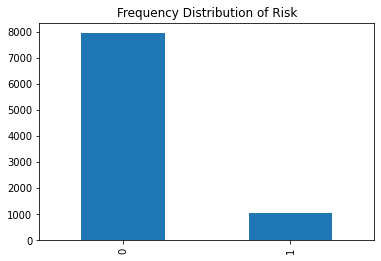

In [14]:
#bar plot for the risk column
df_prep['risk'].value_counts().plot.bar(title='Frequency Distribution of Risk')

plt.show()

In [15]:
# Creating a final dataset to be used in our modeling

df_final = df_prep.copy()

df_final.head(1)

,amount_deposited,amount_received,amount_transfers_from_bank,mpesa_credits,number_days_airtime<2,okoa_jahazi_loan_amount,Loan_age,risk
0,27590,53226.0,0.0,80816.0,139,800.0,5,0


In [16]:
# Dropping the column "Loan_age"

df_final.drop('Loan_age', axis = 1, inplace = True)

print(df_final.shape)

df_final.head(1)

(8981, 7)


,amount_deposited,amount_received,amount_transfers_from_bank,mpesa_credits,number_days_airtime<2,okoa_jahazi_loan_amount,risk
0,27590,53226.0,0.0,80816.0,139,800.0,0


## 3.4. Checking for normality 

In [17]:
#since the p value may not be accurate when doing the shapiro wilk test for normality
#"p-value may not be accurate for N > 5000."
#do simple sampling
df_sample = df_final.sample(n = 10,replace = "False")
print(df_sample)

      amount_deposited  amount_received  amount_transfers_from_bank  \
7427              8700              0.0                         0.0   
7835             78900          99600.0                         0.0   
5629              2230          82073.0                         0.0   
8179              2000              0.0                      8500.0   
1846              1650          26318.0                         0.0   
1300             62050          23322.0                         0.0   
4545                 0          14948.0                         0.0   
5866            347500         298202.0                         0.0   
4403             92420           2100.0                         0.0   
1501             51800          28652.0                         0.0   

      mpesa_credits  number_days_airtime<2  okoa_jahazi_loan_amount  risk  
7427         8700.0                    155                      0.0     0  
7835       178500.0                     43                    160.

In [18]:
# Check whether our dataset is normally distributed

import math
from scipy.stats import shapiro 
stat,p = shapiro(df_sample)
print('statistics = %.3f,p = %.3f'%(stat,p))
alpha = o=0.05
if p > alpha:
  print('sample looks gausian')
else:
  print('sample does not look gausian')


statistics = 0.409,p = 0.000
sample does not look gausian


## 3.5. EDA

While exploring the data, we look at the distributions of the numerical variables.

### 3.5.1. Univariate Analysis

A look at the characteristics and distrbution of each variable

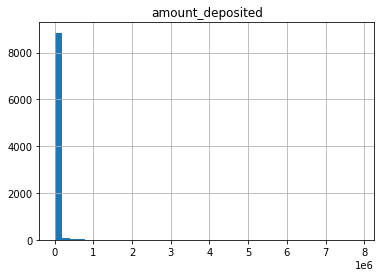

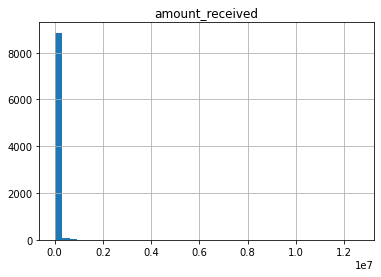

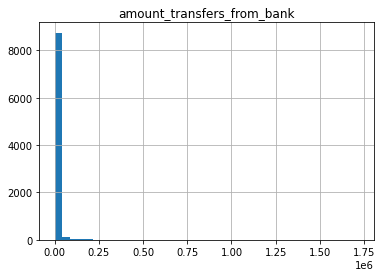

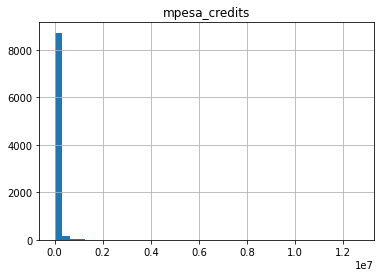

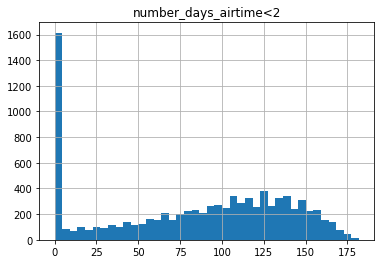

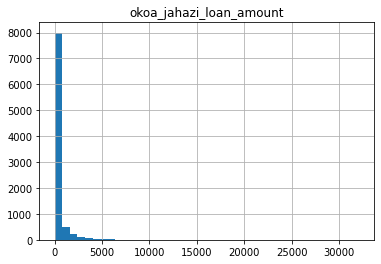

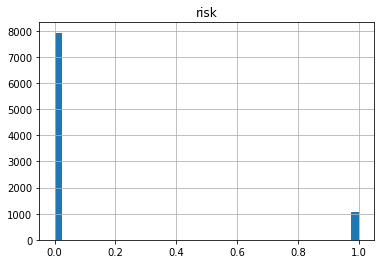

In [19]:
# obtaining a list of all the columns in the dataset

cols_ua = list(df_final.columns)

# initializing the count

i = 0

# drawing histograms for each variable

for col in cols_ua:
    df_final[col].hist(bins = 40)
    plt.title(col)
    plt.show()
    i+= 1

The Variables below all have their values mainly around zero and they are skewed to the right.
- amount_deposited
- amount_received	
- amount_transfers_from_bank
- mpesa_credits	
- okoa_jahazi_loan_amount
  
The variable 'number_days_airtime<2' shws the characteristics of a mixture ditribution.

The distribution of loan age is skewed to the right.
The majority of the customers have loans that are less than 90 days.

### 3.5.2. Bivariate Analysis 

In [ ]:
#Create a pair plot
sns.pairplot(data=df_final, diag_kind= 'kde')

plt.show()

### 3.5.3. Multivariate Analysis

In [ ]:
# Correlation Matrix

corr = df_final.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

# 4. Modeling

Our project consists of predicting whether an individual will default on a loan or not.  
Our target variable "risk" takes on the values 0 and 1. 
Hence we use a classification algorithm.

## 4.1. Model Selection

We will use Tensorflow as our classification algorithm.
More models will be used in order to challenge our results.

In [ ]:
# We import all the libraries required for our modeling

# For train test split modeling
from sklearn.model_selection import train_test_split

# Import a standardization library
from sklearn.preprocessing import StandardScaler

# Import an Multi-Layer Perceptron Classifier model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPClassifier

#Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report

## 4.2. Train - Test - Split Design

We use the train-test split algorithm on our dataset to perform our modeling.
First we separate our target variable from the rest of the dataset.

In [ ]:
# First we separate our target variable from the rest of the dataset.

X = df_final.drop('risk', axis = 1)

y = df_final.risk

In [ ]:
X.shape

In [ ]:
# We split the data into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 , stratify = y)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
# Normalizing our training Data

# Initialize the scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train)

# Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


## 4.3. Model Training

The choice of our model is "sequential".

In [ ]:
# Number of features

print(f"The number of features is {X.shape[1]}, hence we choose the first layer of the neural network with {X.shape[1]} nodes")

In [ ]:
# Modeling usinf train dataset and fitting to test dataset

tf.random.set_seed(0)

model = Sequential()

model.add(
        Dense(6, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)

model.add(
        Dense(3, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=500, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

## 4.4. Model Evaluation and Validation

In [ ]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

plt.title("Loss Plot")

plt.show()

This validation result, the Loss plot, shows us the model is well fitted.

In [ ]:
accuracy = model.evaluate(X, y)

#print(accuracy)
print("%s: %.2f%%" % (model.metrics_names[1], accuracy[1]*100))

## 4.5. Challenging the Solution

we are going to use MPLClassifier class.Multilayer perceptron is used when its output is binary which is our case here.

In [ ]:
# Creating our model

# the number of neurons comprising that hidden layer is equal to the number of features (columns) in your data.
mlp = MLPClassifier(hidden_layer_sizes=(6,6,6), activation='logistic', random_state=10, max_iter=500)
 

# fitting the data
mlp.fit(X_train,y_train)

# Predicting
y_pred = mlp.predict(X_test)

# Evaluation
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------')

print(classification_report(y_test,y_pred))

### Validating some ML algorithm by its accuracy - Model Score

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [ ]:
from matplotlib import pyplot
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

This comparison shows that Logistic regression, LDA, SVM perform with the same Accuracy.  
The results also show that our model performs better than the rest with accuracy of 88.35%

# 5. Conclusion and Recommendation

Out of the various models evaluated, accuracy results show us that the sequential model by Tensorflow keras has better accuracy (88.35) than alternatives.  

Top features in determining whether an individual would default a loan or not were identified to be amount deposited, amount received and amount transfers from bank.